In [102]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

preliminary data analysis of unmodified mxene dataset. Start by loading data into dataframe

In [81]:
df = pd.read_excel("dataset_mx_solvent_using_hsp.xlsx")
print(df.head())
print(df.info())
print(df.describe())

labdf = df[df["label"] != 0]

dfnozero = df.loc[:, (df != 0).any(axis=0)]

labdfnozero = labdf.loc[:, (labdf != 0).any(axis=0)]

   Unnamed: 0     mx method       solvent  label                     inchikey  \
0           0  Ti3C2     HF         water      1  XLYOFNOQVPJJNP-UHFFFAOYSA-N   
1           1  Ti3C2     HF       ethanol      1  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   
2           2  Ti3C2     HF      methanol     -1  OKKJLVBELUTLKV-UHFFFAOYSA-N   
3           3  Ti3C2     HF       acetone     -1  CSCPPACGZOOCGX-UHFFFAOYSA-N   
4           4  Ti3C2     HF  acetonitrile     -1  WEVYAHXRMPXWCK-UHFFFAOYSA-N   

     δd    δp    δh  molarvolume  ...  h_bond_donor_count  \
0  15.5  16.0  42.3         18.0  ...                   1   
1  15.8   8.8  19.4         58.5  ...                   1   
2  15.1  12.3  22.3         40.7  ...                   1   
3  15.5  10.4   7.0         74.0  ...                   0   
4  15.3  18.0   6.1         52.6  ...                   0   

   h_bond_acceptor_count  rotatable_bond_count  heavy_atom_count  \
0                      1                     0                 1   
1         

visualize labelled vs unlabelled data, plot distribution of solvents, plot distribution of MXenes

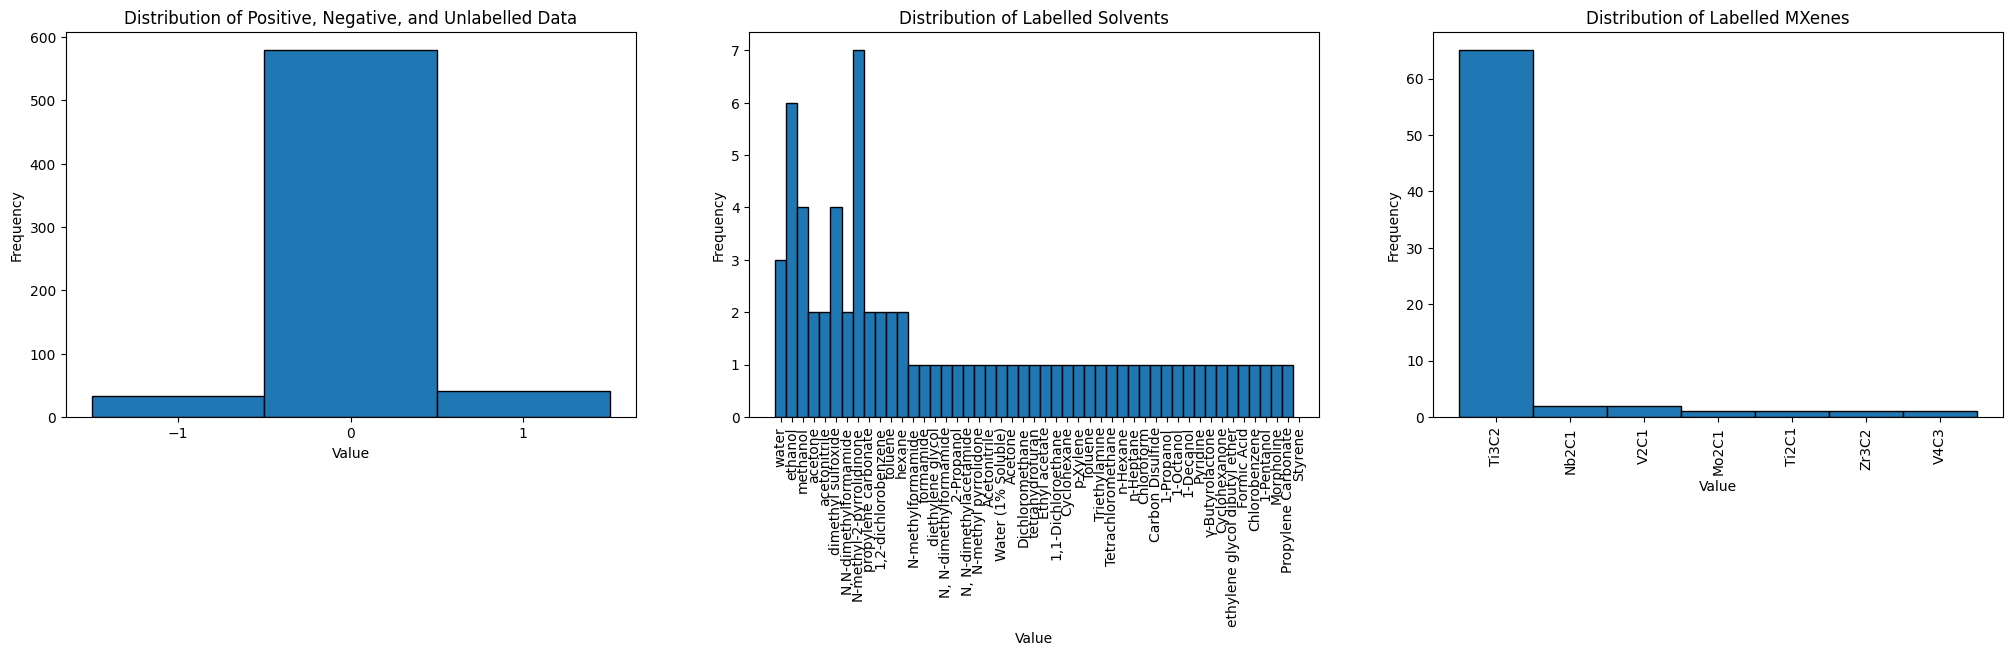

40


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25,5))

axs[0].hist(df["label"],bins=[-1.5,-0.5,0.5,1.5], align="mid", edgecolor='black')
axs[0].set_xticks(np.unique(df["label"]))
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Positive, Negative, and Unlabelled Data')

axs[1].hist(labdf["solvent"], bins=np.arange(len(np.unique(df["solvent"])))-0.5, align="mid", edgecolor='black')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Labelled Solvents')
axs[1].tick_params(axis='x', labelrotation=90)

axs[2].hist(labdf["mx"], bins=np.arange(len(np.unique(df["mx"])))-0.5, align="mid", edgecolor='black')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Labelled MXenes')
axs[2].tick_params(axis='x', labelrotation=90)

plt.show()

simple correlation matrices for full dataset, then dataset with no all zero columns

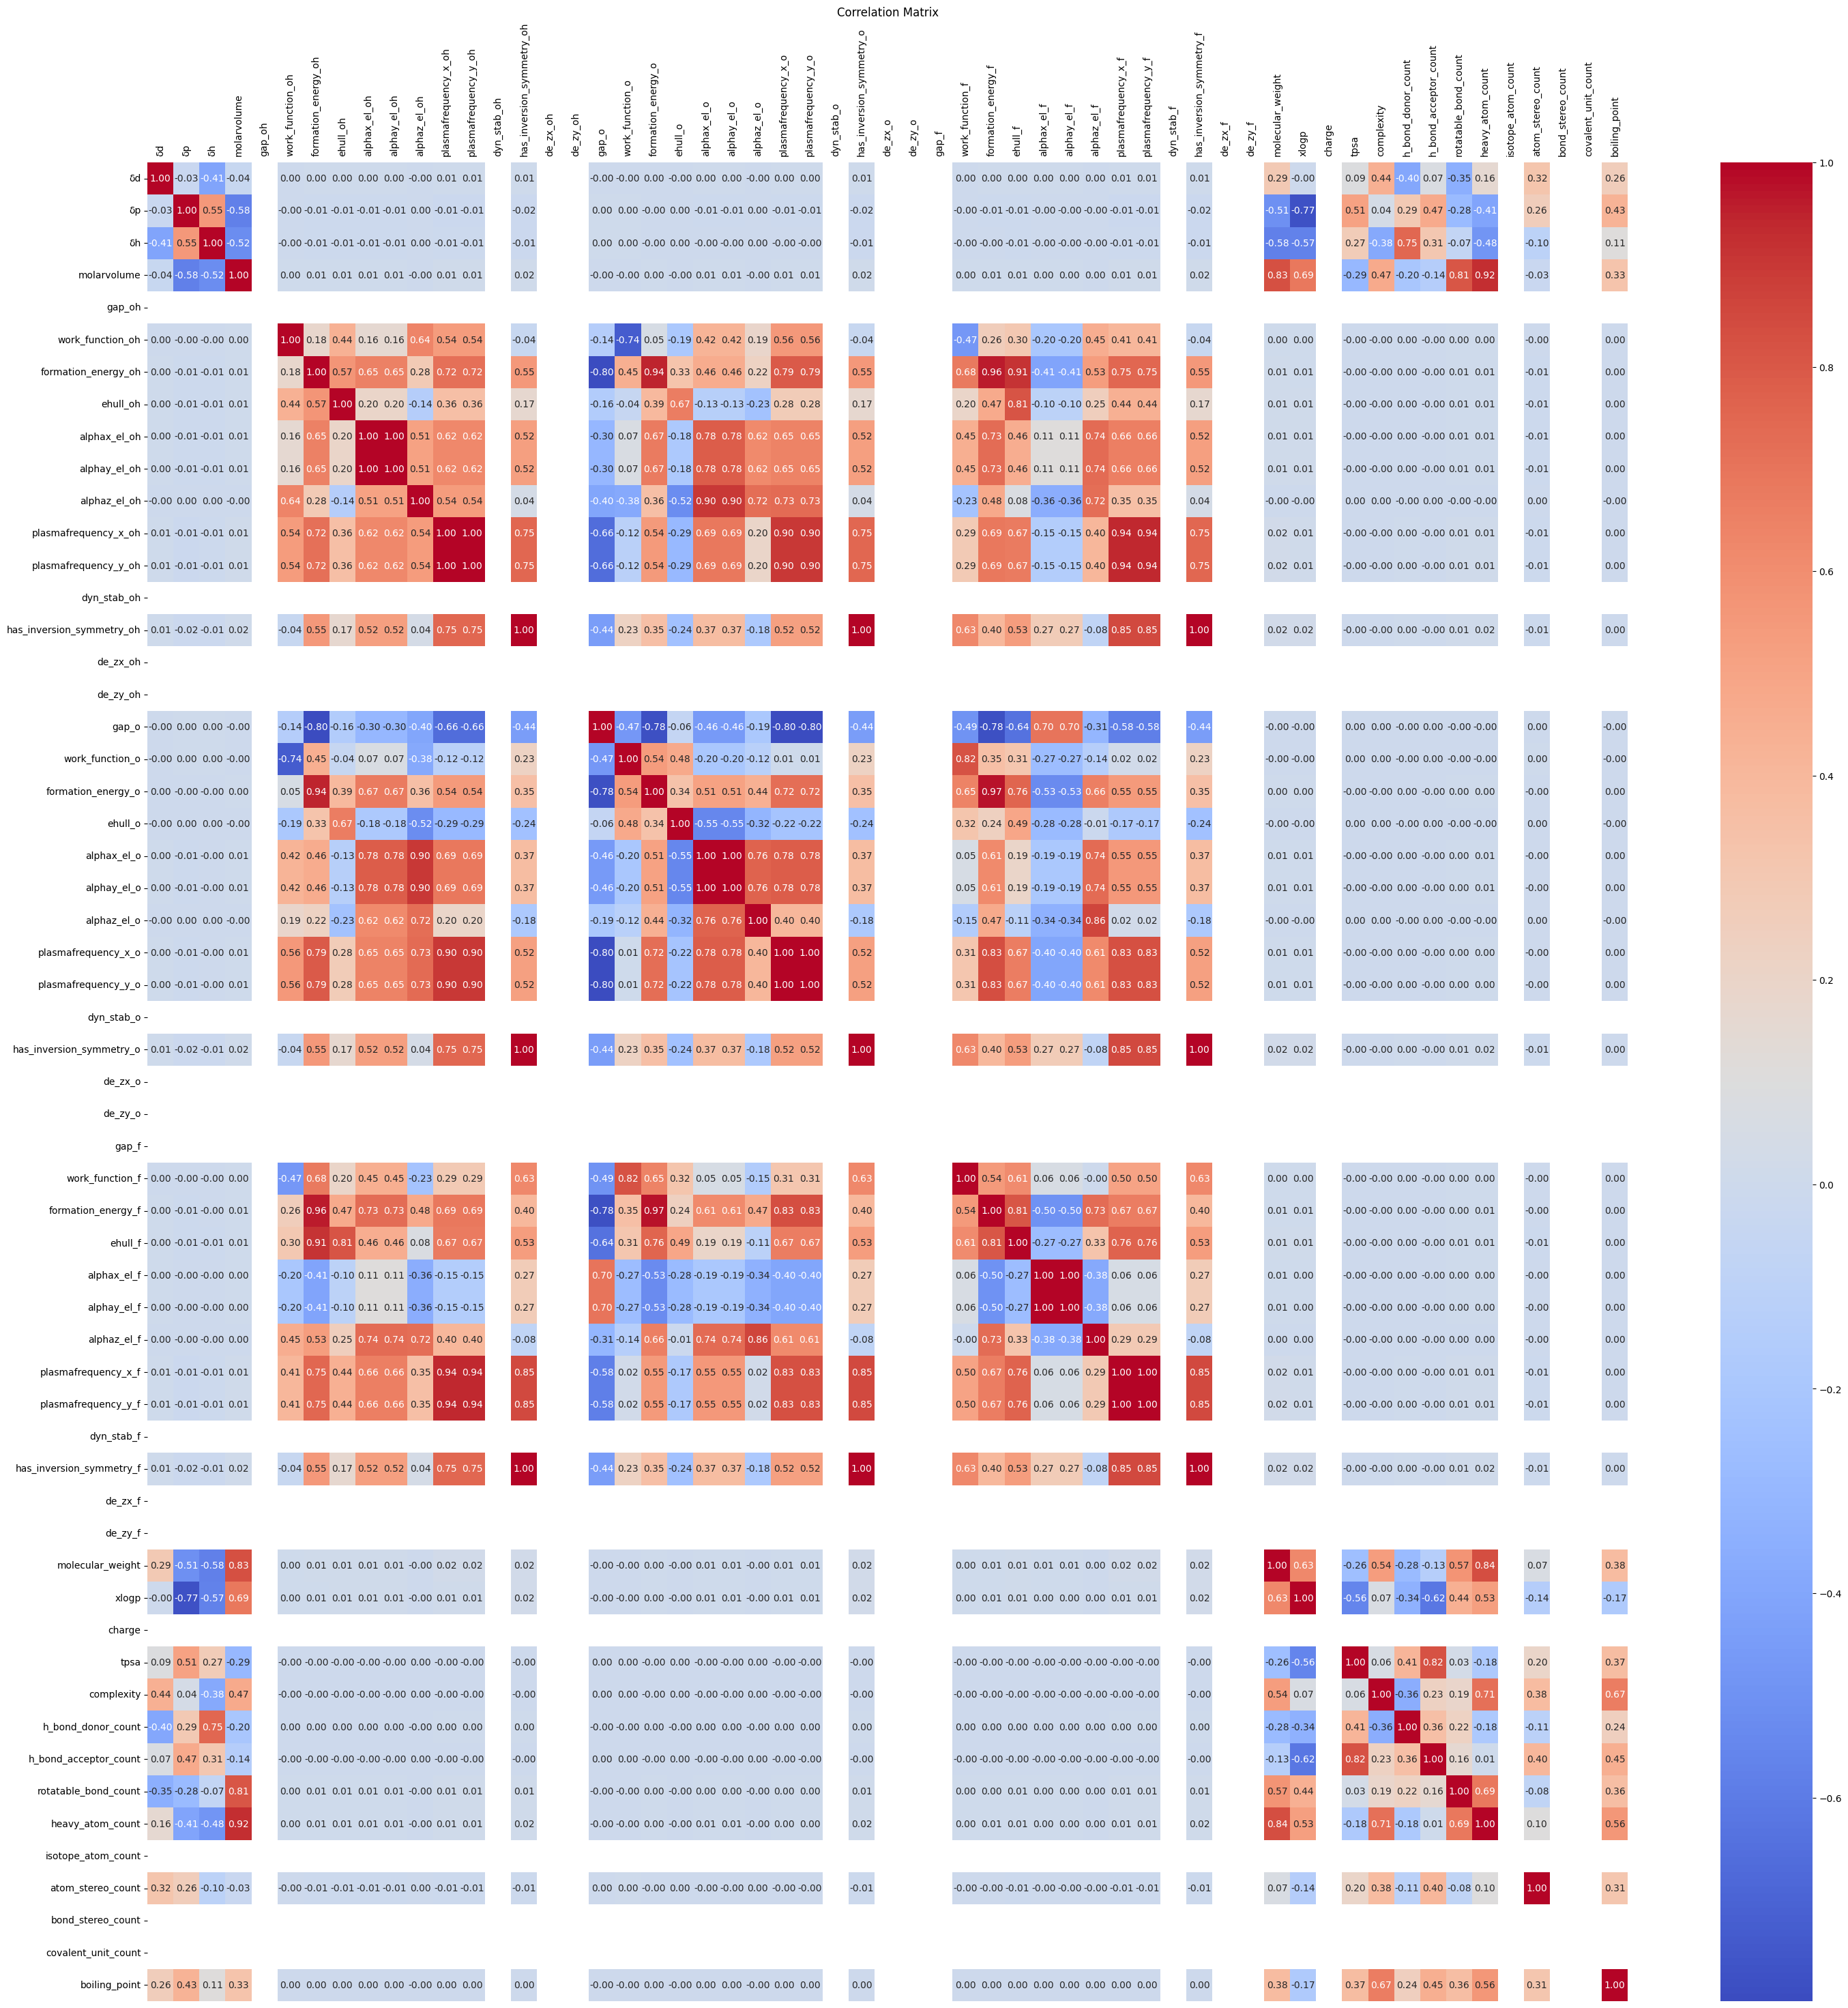

In [77]:
correlation_matrix = df.iloc[:, 6:-1].corr()
plt.figure(figsize=(35,35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90)
plt.show()

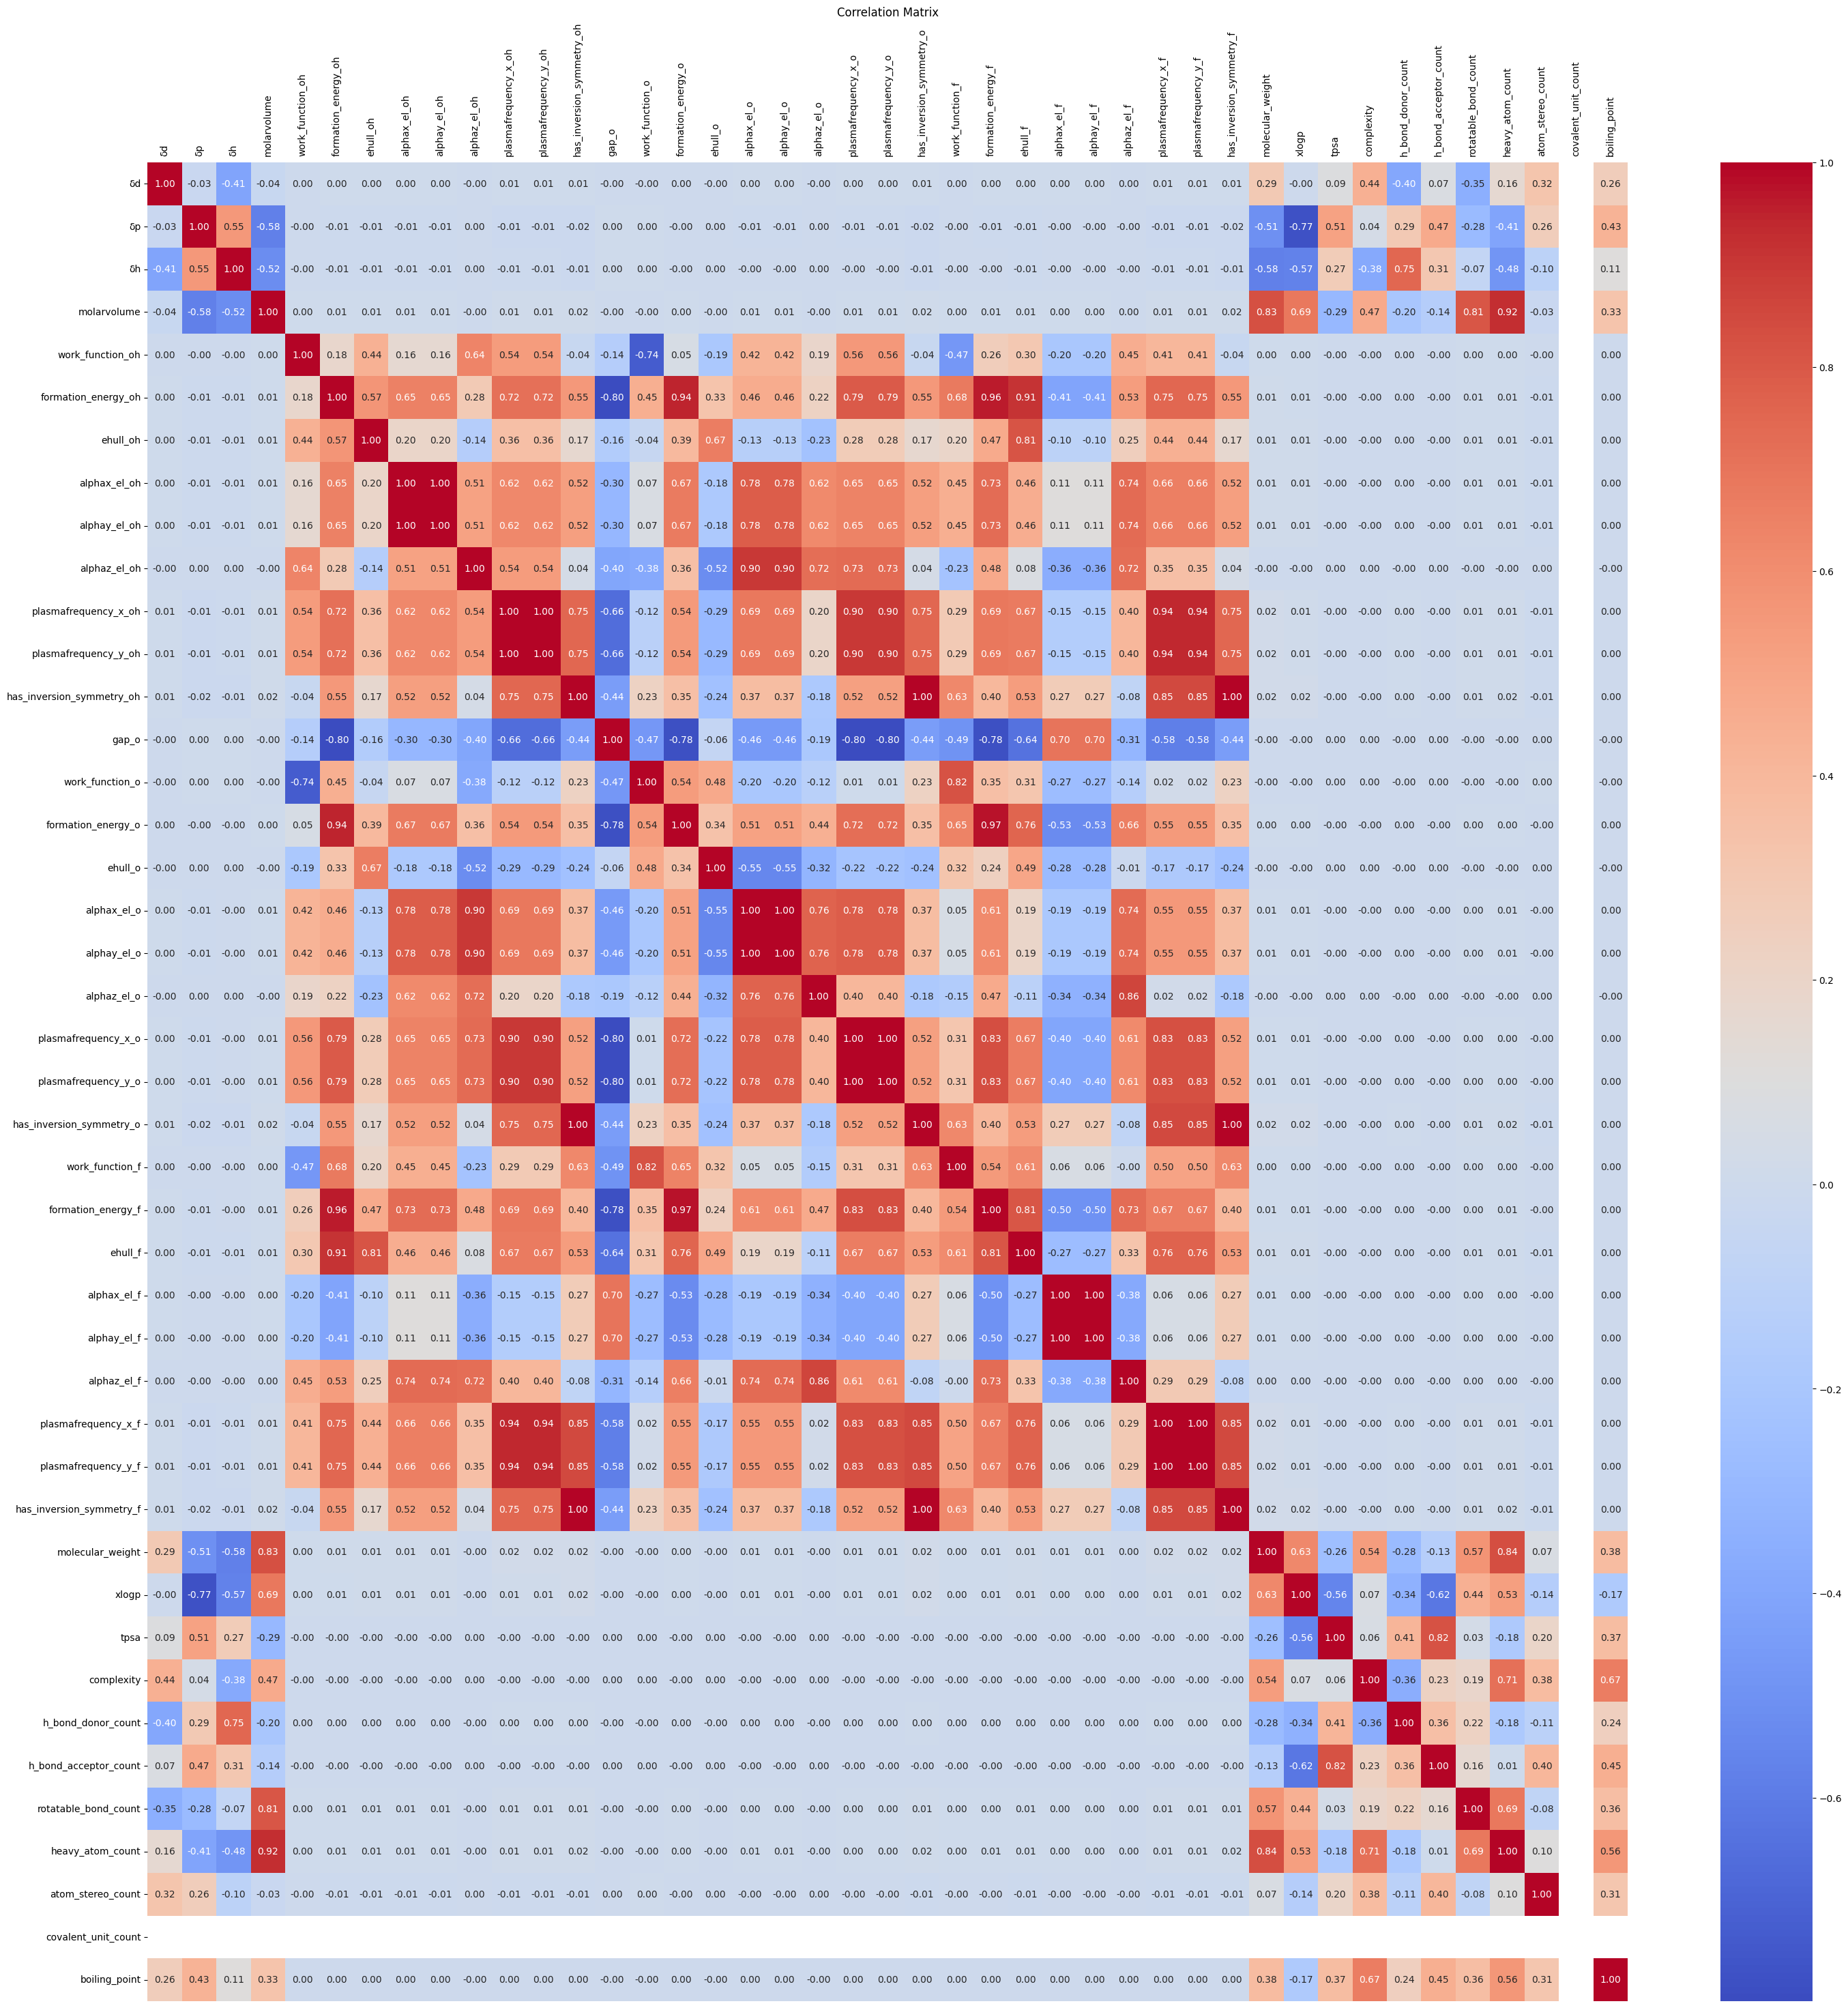

In [78]:
correlation_matrix = dfnozero.iloc[:, 6:-1].corr()
plt.figure(figsize=(35,35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90)
plt.show()

feature importance calculations for xgboost, random forest classifiers on only labelled data

(74, 44) (74,)
Feature  0:                             δd, Score: 0.05618
Feature  1:                             δp, Score: 0.11930
Feature  2:                             δh, Score: 0.14949
Feature  3:                    molarvolume, Score: 0.07368
Feature  4:               work_function_oh, Score: 0.00104
Feature  5:            formation_energy_oh, Score: 0.00211
Feature  6:                       ehull_oh, Score: 0.00580
Feature  7:                   alphax_el_oh, Score: 0.00171
Feature  8:                   alphay_el_oh, Score: 0.00143
Feature  9:                   alphaz_el_oh, Score: 0.00030
Feature 10:           plasmafrequency_x_oh, Score: 0.00363
Feature 11:           plasmafrequency_y_oh, Score: 0.00487
Feature 12:      has_inversion_symmetry_oh, Score: 0.00331
Feature 13:                          gap_o, Score: 0.00023
Feature 14:                work_function_o, Score: 0.00328
Feature 15:             formation_energy_o, Score: 0.00074
Feature 16:                        ehull_

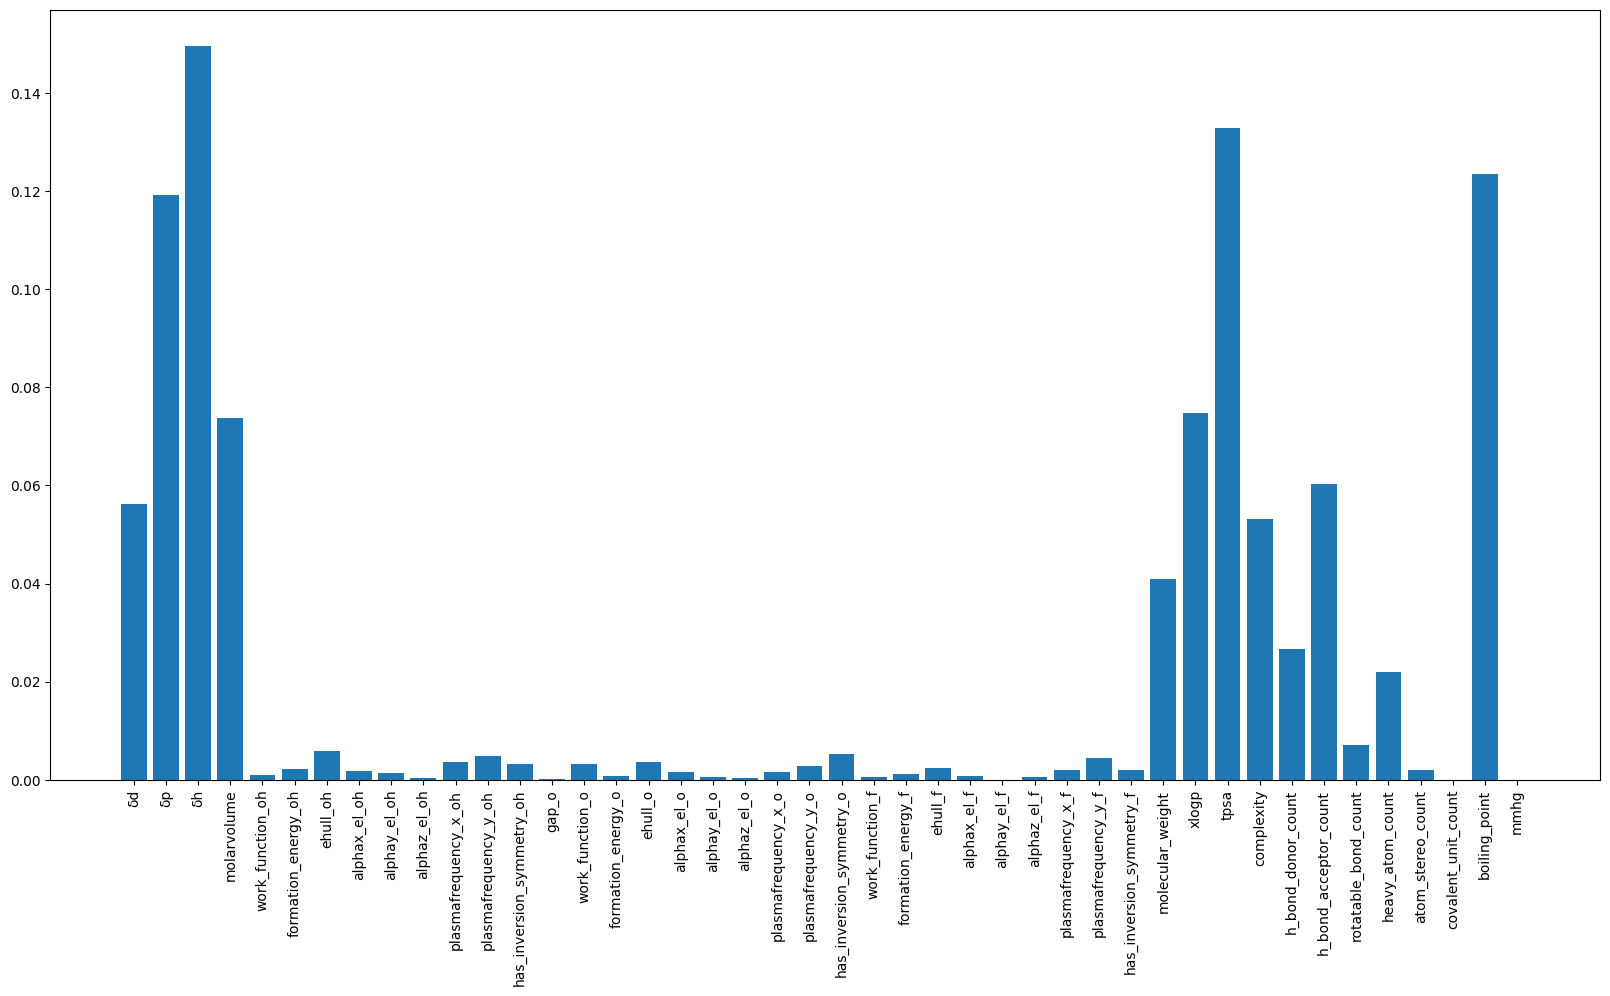

In [126]:
X = labdfnozero.iloc[:, 6::]
y = labdfnozero["label"]
print(X.shape, y.shape)
model = sk.ensemble.RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %2d: %30s, Score: %.5f' % (i,labdfnozero.columns[i+6],v))
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([labdfnozero.columns[x+6] for x in range(len(importance))], importance)
plt.tick_params(axis='x', labelrotation=90)
plt.show()

(74, 44) (74,)
Feature  0:                             δd, Score: 0.02068
Feature  1:                             δp, Score: 0.03317
Feature  2:                             δh, Score: 0.15257
Feature  3:                    molarvolume, Score: 0.08285
Feature  4:               work_function_oh, Score: 0.00000
Feature  5:            formation_energy_oh, Score: 0.00000
Feature  6:                       ehull_oh, Score: 0.00000
Feature  7:                   alphax_el_oh, Score: 0.00000
Feature  8:                   alphay_el_oh, Score: 0.00000
Feature  9:                   alphaz_el_oh, Score: 0.00000
Feature 10:           plasmafrequency_x_oh, Score: 0.00000
Feature 11:           plasmafrequency_y_oh, Score: 0.00000
Feature 12:      has_inversion_symmetry_oh, Score: 0.00000
Feature 13:                          gap_o, Score: 0.00000
Feature 14:                work_function_o, Score: 0.00000
Feature 15:             formation_energy_o, Score: 0.00000
Feature 16:                        ehull_

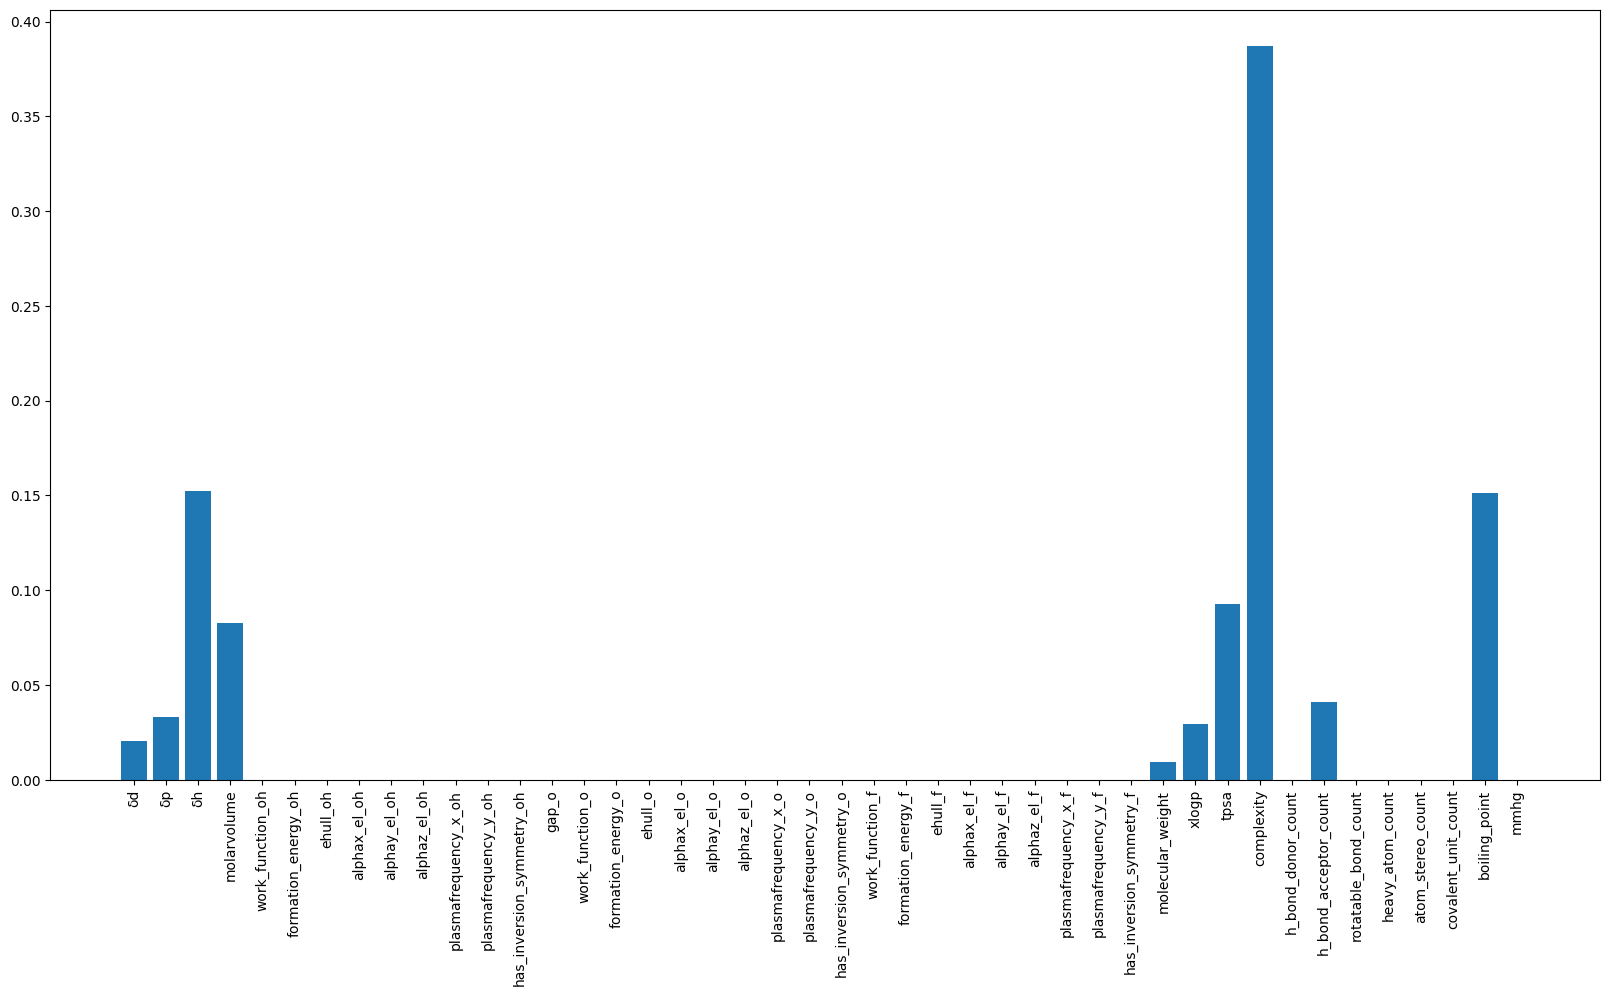

In [125]:
X = labdfnozero.iloc[:, 6::]
y = np.array([0 if x == -1 else x for x in labdfnozero["label"]])
print(X.shape, y.shape)
model = xgboost.XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %2d: %30s, Score: %.5f' % (i,labdfnozero.columns[i+6],v))
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([labdfnozero.columns[x+6] for x in range(len(importance))], importance)
plt.tick_params(axis='x', labelrotation=90)
plt.show()

focus on high importance features for correlation matrices

In [135]:
rfHighImportance = pd.concat([labdfnozero.iloc[:, 6:10], labdfnozero.iloc[:, 38:44], labdfnozero.iloc[:, -2]], axis=1)
xgHighImportance = pd.concat([labdfnozero.iloc[:, 6:10], labdfnozero.iloc[:, 38:42], labdfnozero.iloc[:, 43], labdfnozero.iloc[:, -2]], axis=1)

print(rfHighImportance.head())
print(xgHighImportance.head())

     δd    δp    δh  molarvolume  molecular_weight  xlogp  tpsa  complexity  \
0  15.5  16.0  42.3         18.0            18.015   -0.5   1.0         0.0   
1  15.8   8.8  19.4         58.5            46.070   -0.1  20.2         2.8   
2  15.1  12.3  22.3         40.7            32.042   -0.5  20.2         2.0   
3  15.5  10.4   7.0         74.0            58.080   -0.1  17.1        26.3   
4  15.3  18.0   6.1         52.6            41.050    0.0  23.8        29.3   

   h_bond_donor_count  h_bond_acceptor_count  boiling_point  
0                   1                      1          373.2  
1                   1                      1          351.5  
2                   1                      1          337.8  
3                   0                      1          329.3  
4                   0                      1          354.8  
     δd    δp    δh  molarvolume  molecular_weight  xlogp  tpsa  complexity  \
0  15.5  16.0  42.3         18.0            18.015   -0.5   1.0         0.

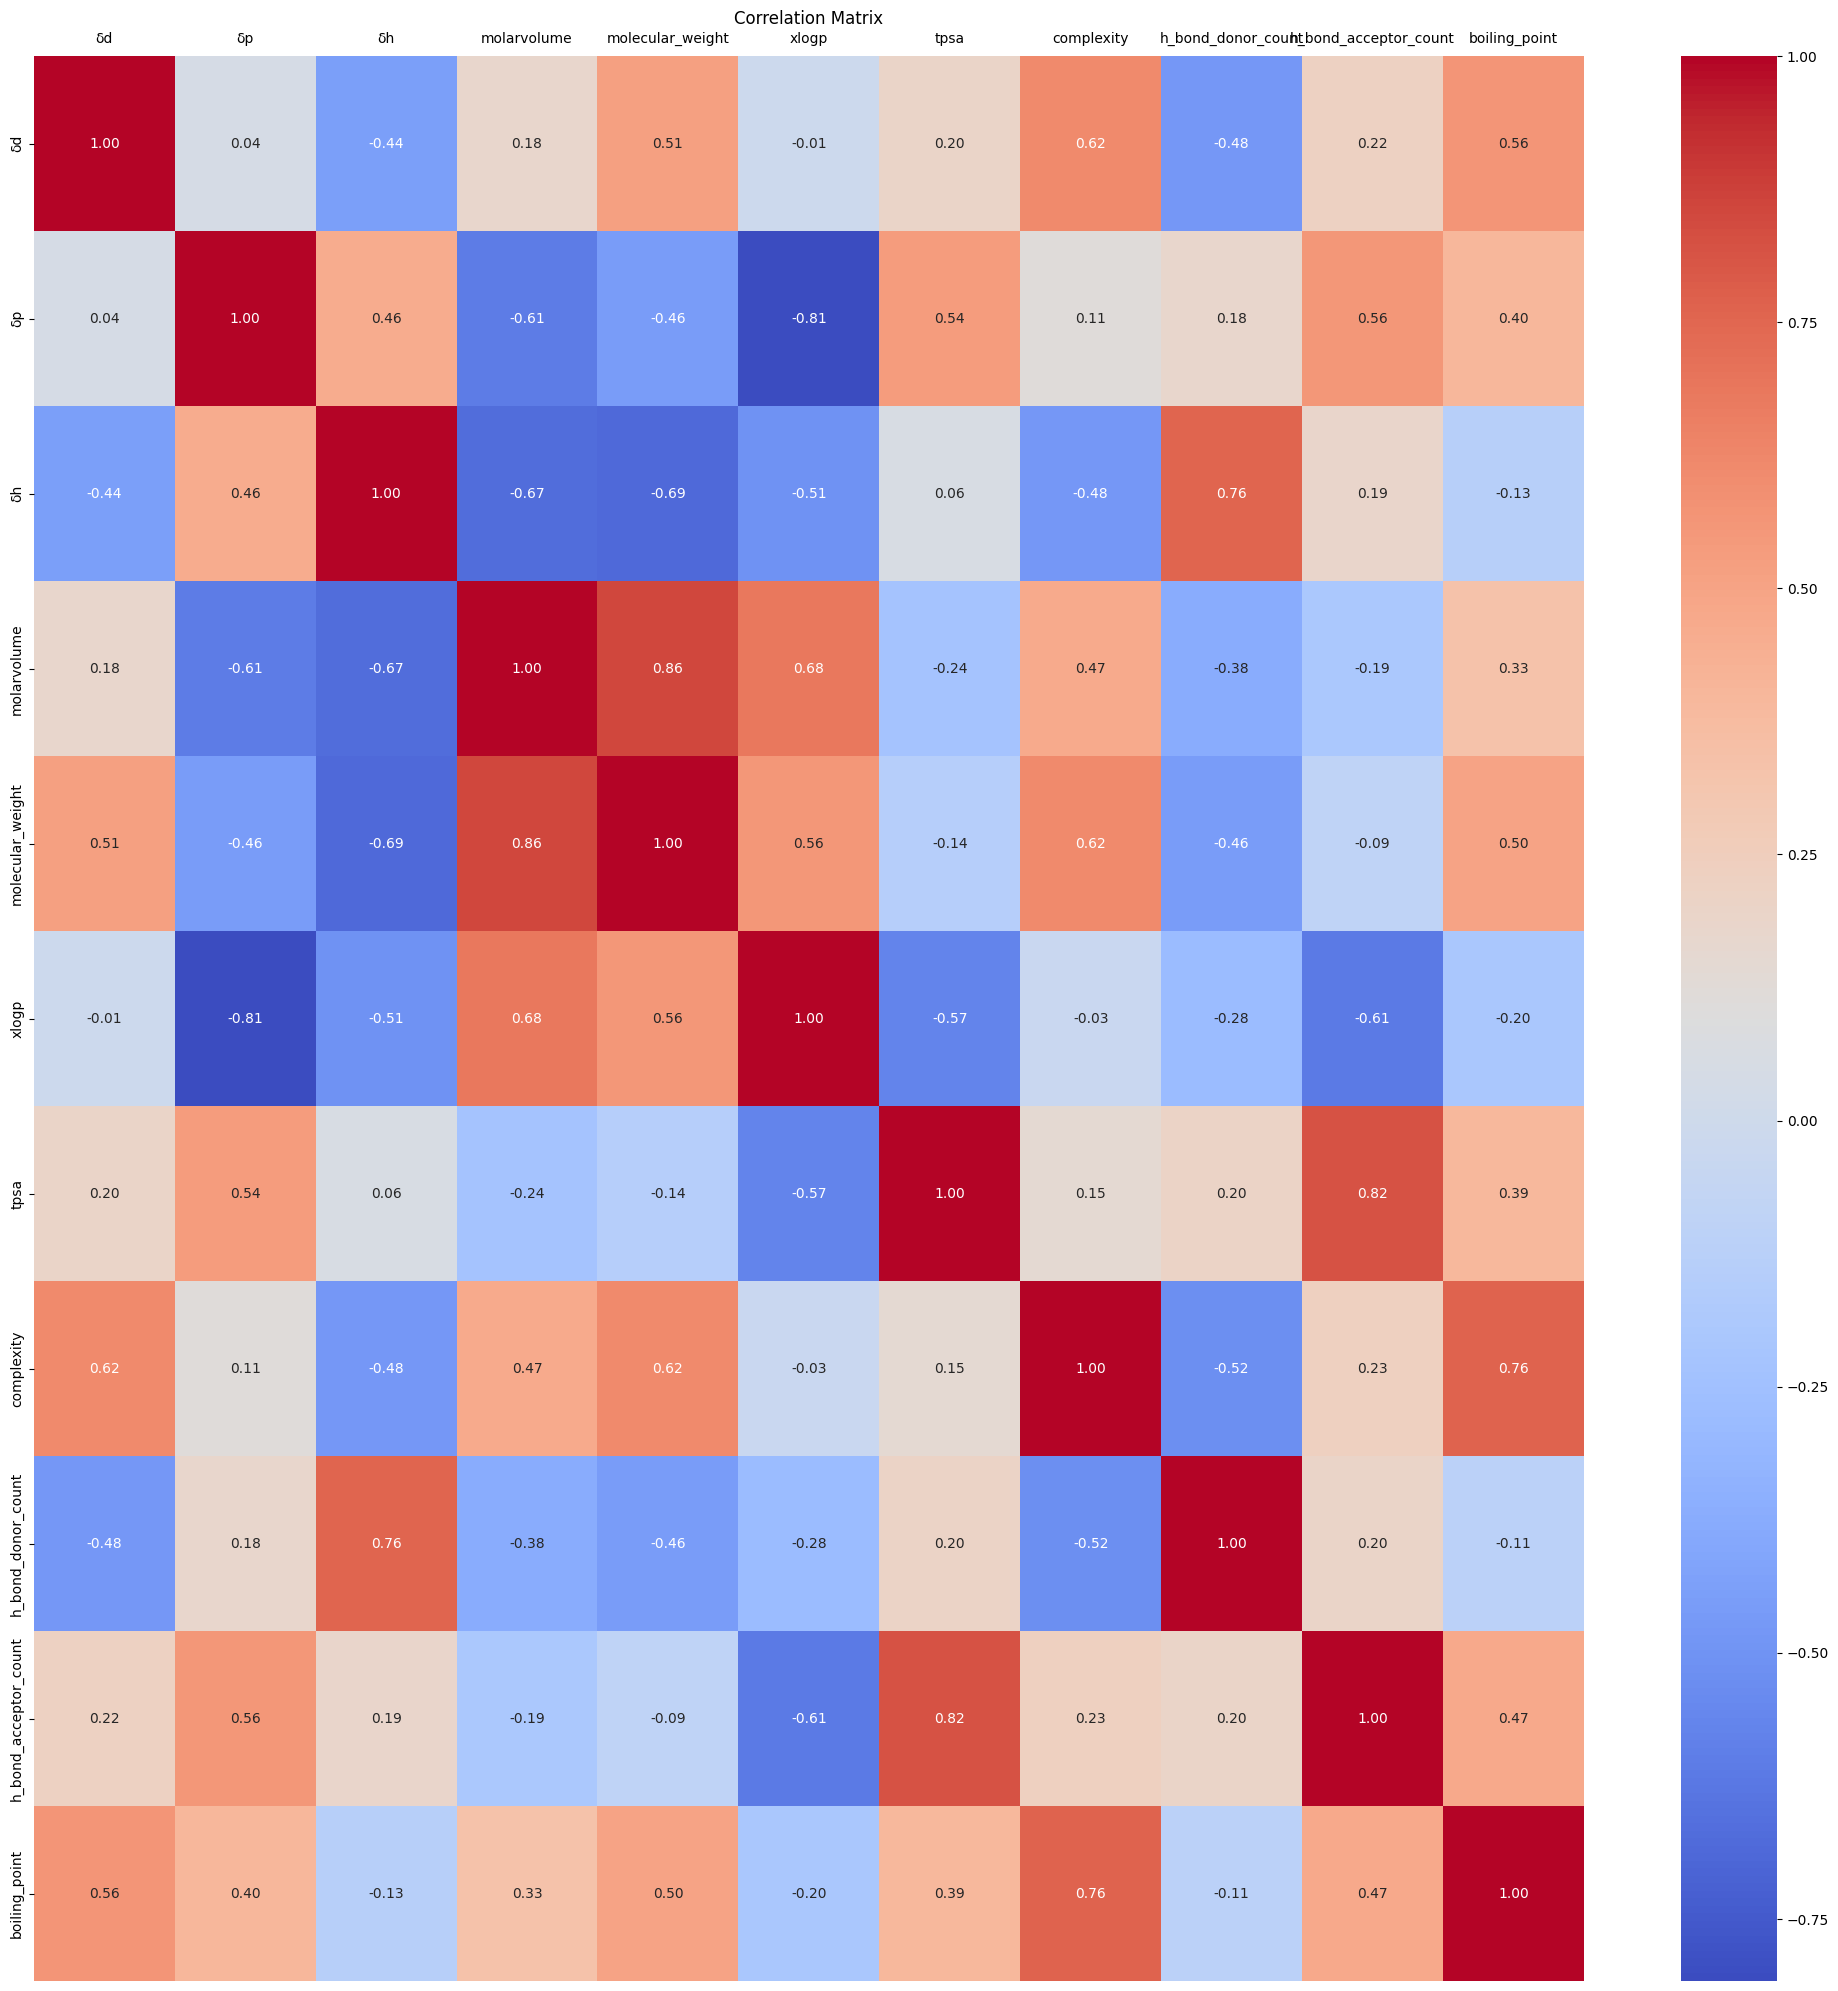

In [137]:
correlation_matrix = rfHighImportance.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.show()

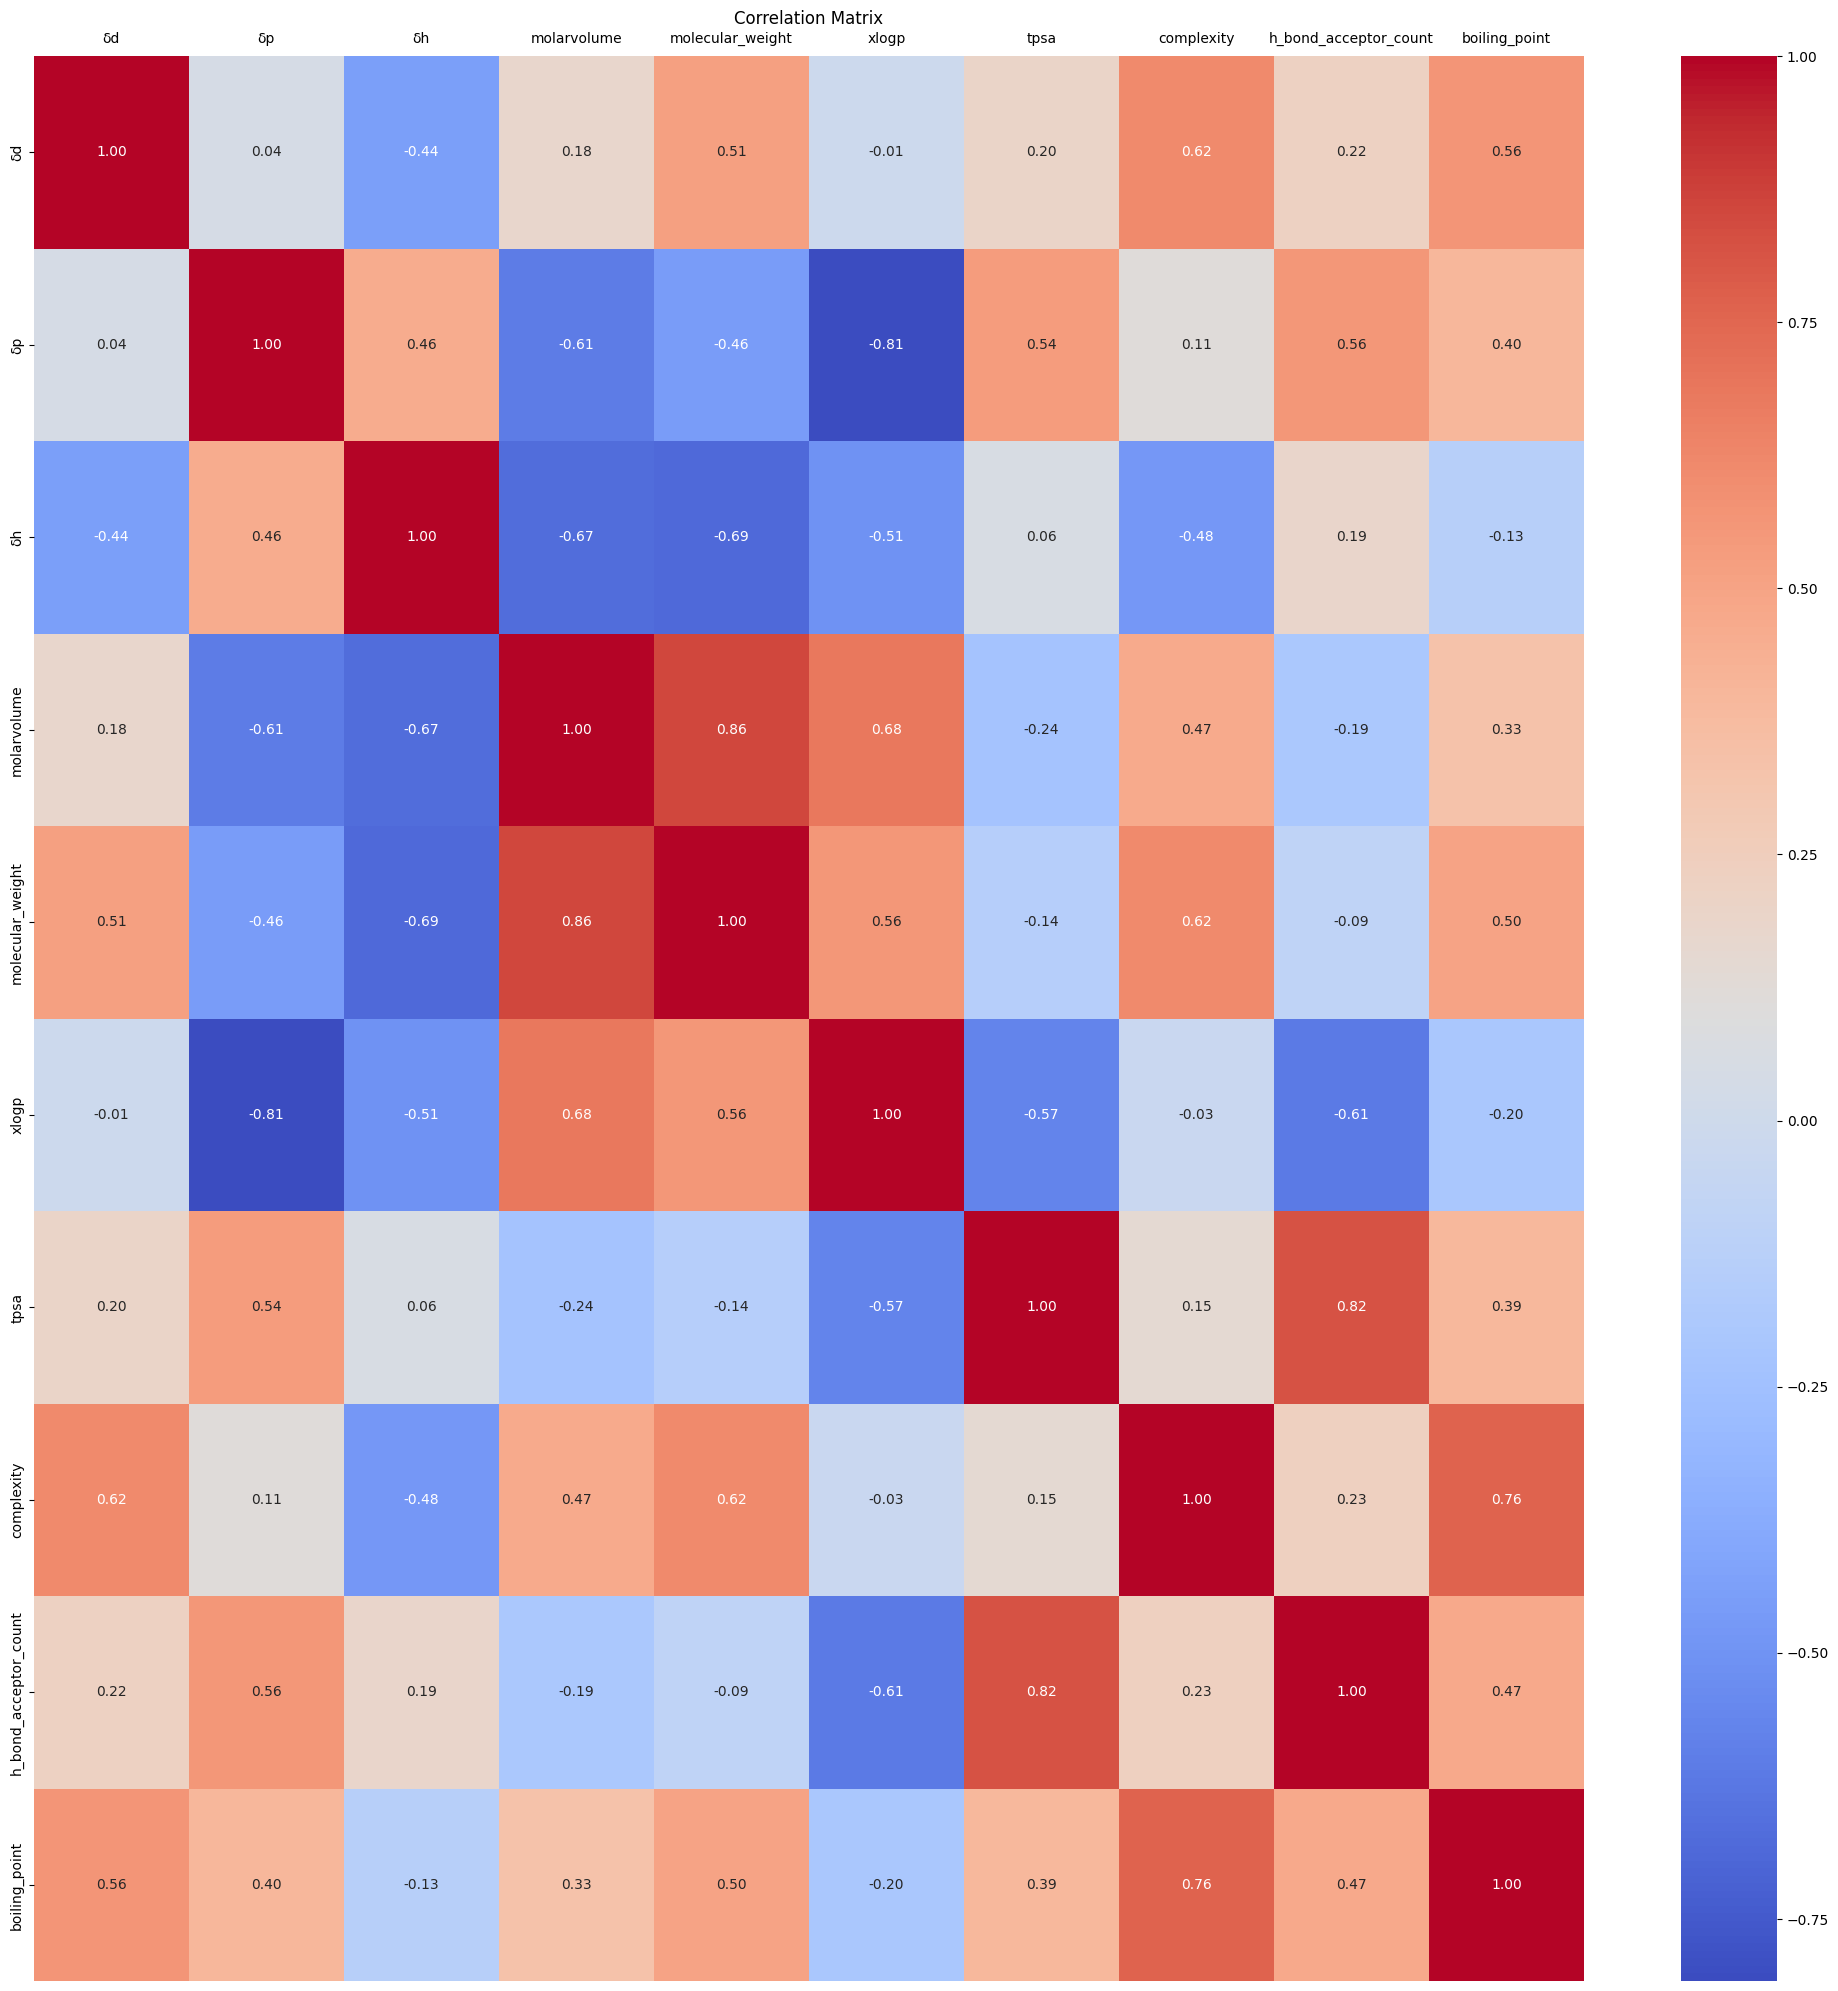

In [138]:
correlation_matrix = xgHighImportance.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.show()